In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [3]:
# Read the country mapping from the JSON file
with open("../country_mapping.json", "r") as json_file:
    country_mapping = json.load(json_file)

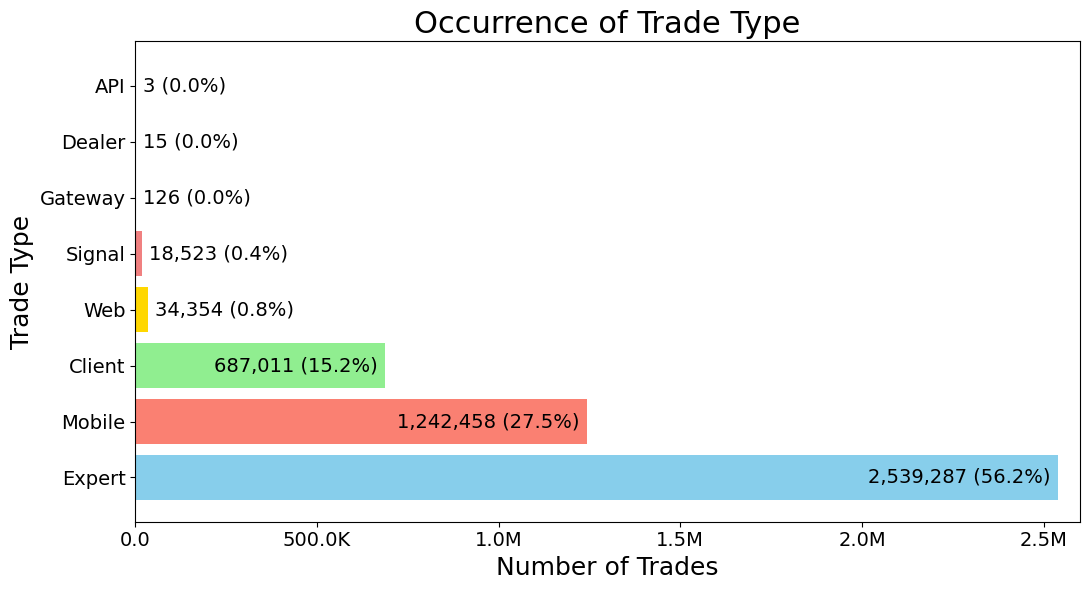

In [4]:
trade_reason_df = pd.read_csv("../Dataset/trades.csv")
reason_df = pd.read_csv("../Dataset/reason.csv")

# Create a mapping between numbers and codes
reason_mapping = dict(zip(reason_df['code'], reason_df['reason']))

# Count the occurrences of each unique reason
reason_counts = trade_reason_df['reason'].value_counts()

data_to_print = []

# Print the counts of each reason with their codes
for reason_code, count in reason_counts.items():
    reason = reason_mapping.get(reason_code, f"Unknown ({reason_code})")
    data_to_print.append([reason, count])


# Calculate total count
total_count = sum(count for _, count in data_to_print)

# Calculate percentages
data_with_percentage = [(reason, count, count / total_count * 100) for reason, count in data_to_print]

# Sort data in descending order based on counts
sorted_data = sorted(data_with_percentage, key=lambda x: x[1], reverse=True)

# Plotting
plt.figure(figsize=(11, 6))

# Data preparation
reasons = [item[0] for item in sorted_data]
counts = [item[1] for item in sorted_data]
percentages = [item[2] for item in sorted_data]

# Assigning colors to bars
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral']

# Plotting horizontally
bars = plt.barh(reasons, counts, color=colors)

# Function to format x-axis labels
def format_func(value, tick_number):
    if value >= 1_000_000:
        return f'{value / 1_000_000:.1f}M'
    elif value >= 1_000:
        return f'{value / 1_000:.1f}K'
    else:
        return f'{value}'

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_func))

plt.xlabel('Number of Trades', fontsize=18)
plt.ylabel('Trade Type', fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.xlim([0, 2600000])


plt.title('Occurrence of Trade Type', fontsize=22)
plt.tight_layout()

# Add labels on each bar with count and percentage
for bar, count, percentage in zip(bars, counts, percentages):
    if count < 50000:
        plt.text(bar.get_width() + 20000, bar.get_y() + bar.get_height()/2, f'{count:,} ({percentage:.1f}%)', va='center', ha='left', color='black', fontsize=14)
    else:
        plt.text(bar.get_width() - 20000, bar.get_y() + bar.get_height()/2, f'{count:,} ({percentage:.1f}%)', va='center', ha='right', color='black', fontsize=14)

plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data
trades_df = pd.read_csv("../Dataset/trades.csv")
login_df = pd.read_csv("../Dataset/login.csv")  # Read login data

# Define colors for bars
colors = ['red', 'blue', 'yellow', 'green', 'orange', 'purple', 'pink', 'cyan', 'magenta',
          'lime', 'teal', 'olive', 'maroon', 'navy', 'lavender', 'brown', 'skyblue', 'coral',
          'gold', 'silver', 'indigo', 'turquoise', 'salmon', 'violet']

def clamp(n, smallest, largest):
    return max(smallest, min(n, largest))

In [6]:
country_colors = {
    "Slovenia": "mediumslateblue",
    "United Arab Emirates": "darkgreen",
    "Italy": "royalblue",
    "Slovakia": "cornflowerblue",
    "Spain": "sandybrown",
    "Rwanda": "ivory",
    "Australia": "gold",
    "Netherlands": "orange",
    "Germany": "brown",
    "New Zealand": "silver",
    "Czech Republic": "lavender",
    "France": "tab:blue",
    "Malaysia": "navy",
    "Turkey": "crimson",
    "Canada": "tab:red",
    "Austria": "lightsalmon",
    "Ecuador": "goldenrod",
    "United Kingdom": "blue",
    "Singapore": "lightcoral",
    "Philippines": "palevioletred",
    "Indonesia": "tab:purple",
    "India": "tab:cyan",
    "South Africa": "springgreen",
    "Belgium": "tan",
    "Sweden": "darkorange",
    "Jamaica": "forestgreen",
    "Pakistan": "tab:green"
}

(-0.4, 0.4)

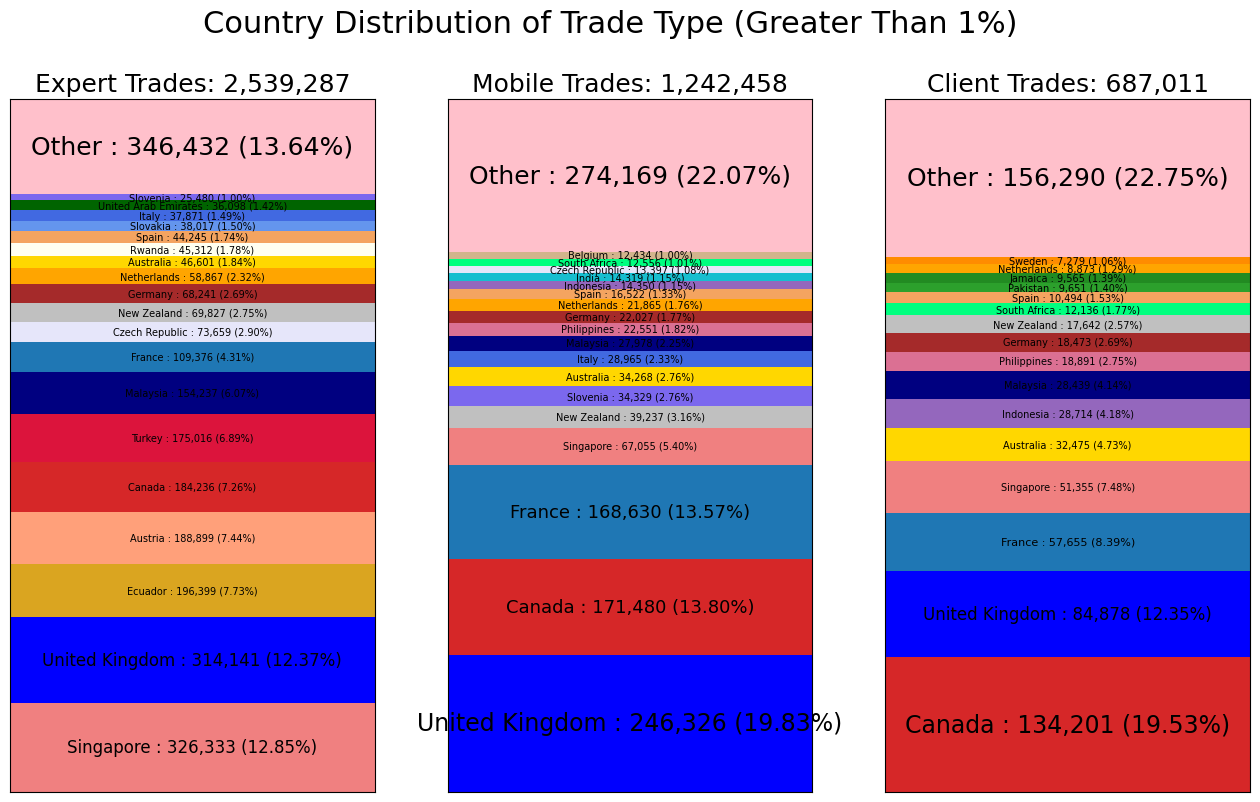

In [7]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 9))
fig.suptitle('Country Distribution of Trade Type (Greater Than 1%)', fontsize=22)

# Create Dataset
reason_df = trades_df[trades_df['reason'] == 1]  # Filter trades with reason code 1

# Merge reason_df and login_df based on the "login" record
merged_df = pd.merge(reason_df, login_df, on='login', how='left')

# Replace country codes with mapped values
merged_df['country'] = merged_df['country'].replace(country_mapping)  # Assuming country_mapping is defined somewhere

# Count occurrences of each country
country_counts = merged_df['country'].value_counts()

# Calculate total count
total_count = country_counts.sum()

# Filter countries with less than 1% of total trades
filtered_country_counts = country_counts[country_counts / total_count >= 0.01]
other_country_counts = country_counts[country_counts / total_count < 0.01]


# Initialize the left position for bars
bottom = 0

# Plot each bar
bars = []
for i, count in enumerate(filtered_country_counts):
    bar = ax1.bar([0], count, bottom=bottom, color=country_colors.get(filtered_country_counts.index[i]))

    font_size = int((count / total_count) * 100)
    font_size = clamp(font_size, 7, 17)

    ax1.text(0, bottom + count / 2, f"{filtered_country_counts.index[i]} : {count:,} ({(count / total_count) * 100:.2f}%)", va='center', ha='center', fontsize=font_size, color='black')

    bars.append(bar)
    bottom += count

bar = ax1.bar([0], other_country_counts.sum(), bottom=bottom, color='pink')
ax1.text(0, bottom + other_country_counts.sum() / 2, f"Other : {other_country_counts.sum():,} ({(other_country_counts.sum() / total_count) * 100:.2f}%)", va='center', ha='center', fontsize=18, color='black')
bars.append(bar)
bottom += other_country_counts.sum()

ax1.set_title(f'Expert Trades: {total_count:,}', fontsize=18)
ax1.set_xticks([])  # Hide x-axis ticks
ax1.set_yticks([])  # Hide y-axis ticks

ax1.set_ylim([0, total_count])
ax1.set_xlim([-0.4, 0.4])

'''
        Mobile
'''

# Create Dataset
reason_df = trades_df[trades_df['reason'] == 5]  # Filter trades with reason code 1

# Merge reason_df and login_df based on the "login" record
merged_df = pd.merge(reason_df, login_df, on='login', how='left')

# Replace country codes with mapped values
merged_df['country'] = merged_df['country'].replace(country_mapping)  # Assuming country_mapping is defined somewhere

# Count occurrences of each country
country_counts = merged_df['country'].value_counts()

# Calculate total count
total_count = country_counts.sum()

# Filter countries with less than 1% of total trades
filtered_country_counts = country_counts[country_counts / total_count >= 0.01]
other_country_counts = country_counts[country_counts / total_count < 0.01]


# Initialize the left position for bars
bottom = 0

# Plot each bar
bars = []
for i, count in enumerate(filtered_country_counts):
    bar = ax2.bar([0], count, bottom=bottom, color=country_colors.get(filtered_country_counts.index[i]))

    font_size = int((count / total_count) * 100)
    font_size = clamp(font_size, 7, 17)

    ax2.text(0, bottom + count / 2, f"{filtered_country_counts.index[i]} : {count:,} ({(count / total_count) * 100:.2f}%)", va='center', ha='center', fontsize=font_size, color='black')

    bars.append(bar)
    bottom += count

bar = ax2.bar([0], other_country_counts.sum(), bottom=bottom, color='pink')
ax2.text(0, bottom + other_country_counts.sum() / 2, f"Other : {other_country_counts.sum():,} ({(other_country_counts.sum() / total_count) * 100:.2f}%)", va='center', ha='center', fontsize=18, color='black')
bars.append(bar)
bottom += other_country_counts.sum()

ax2.set_title(f'Mobile Trades: {total_count:,}', fontsize=18)
ax2.set_xticks([])  # Hide x-axis ticks
ax2.set_yticks([])  # Hide y-axis ticks

ax2.set_ylim([0, total_count])
ax2.set_xlim([-0.4, 0.4])

'''
        CLIENT
'''

# Create Dataset
reason_df = trades_df[trades_df['reason'] == 0]  # Filter trades with reason code 1

# Merge reason_df and login_df based on the "login" record
merged_df = pd.merge(reason_df, login_df, on='login', how='left')

# Replace country codes with mapped values
merged_df['country'] = merged_df['country'].replace(country_mapping)  # Assuming country_mapping is defined somewhere

# Count occurrences of each country
country_counts = merged_df['country'].value_counts()

# Calculate total count
total_count = country_counts.sum()

# Filter countries with less than 1% of total trades
filtered_country_counts = country_counts[country_counts / total_count >= 0.01]
other_country_counts = country_counts[country_counts / total_count < 0.01]


# Initialize the left position for bars
bottom = 0

# Plot each bar
bars = []
for i, count in enumerate(filtered_country_counts):
    bar = ax3.bar([0], count, bottom=bottom, color=country_colors.get(filtered_country_counts.index[i]))

    font_size = int((count / total_count) * 100)
    font_size = clamp(font_size, 7, 17)

    ax3.text(0, bottom + count / 2, f"{filtered_country_counts.index[i]} : {count:,} ({(count / total_count) * 100:.2f}%)", va='center', ha='center', fontsize=font_size, color='black')

    bars.append(bar)
    bottom += count

bar = ax3.bar([0], other_country_counts.sum(), bottom=bottom, color='pink')
ax3.text(0, bottom + other_country_counts.sum() / 2, f"Other : {other_country_counts.sum():,} ({(other_country_counts.sum() / total_count) * 100:.2f}%)", va='center', ha='center', fontsize=18, color='black')
bars.append(bar)
bottom += other_country_counts.sum()

ax3.set_title(f'Client Trades: {total_count:,}', fontsize=18)
ax3.set_xticks([])  # Hide x-axis ticks
ax3.set_yticks([])  # Hide y-axis ticks

ax3.set_ylim([0, total_count])
ax3.set_xlim([-0.4, 0.4])